In [73]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import clear_border
from skimage.color import label2rgb
from skimage import measure
from matplotlib.patches import Rectangle

figsize = (38,24)
image_filename = "images/soil-002.jpg"

In [74]:
def show_image(img, cmap="gray"):
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img, cmap=cmap)
    return fig,ax

(<Figure size 2736x1728 with 1 Axes>, <AxesSubplot:>)

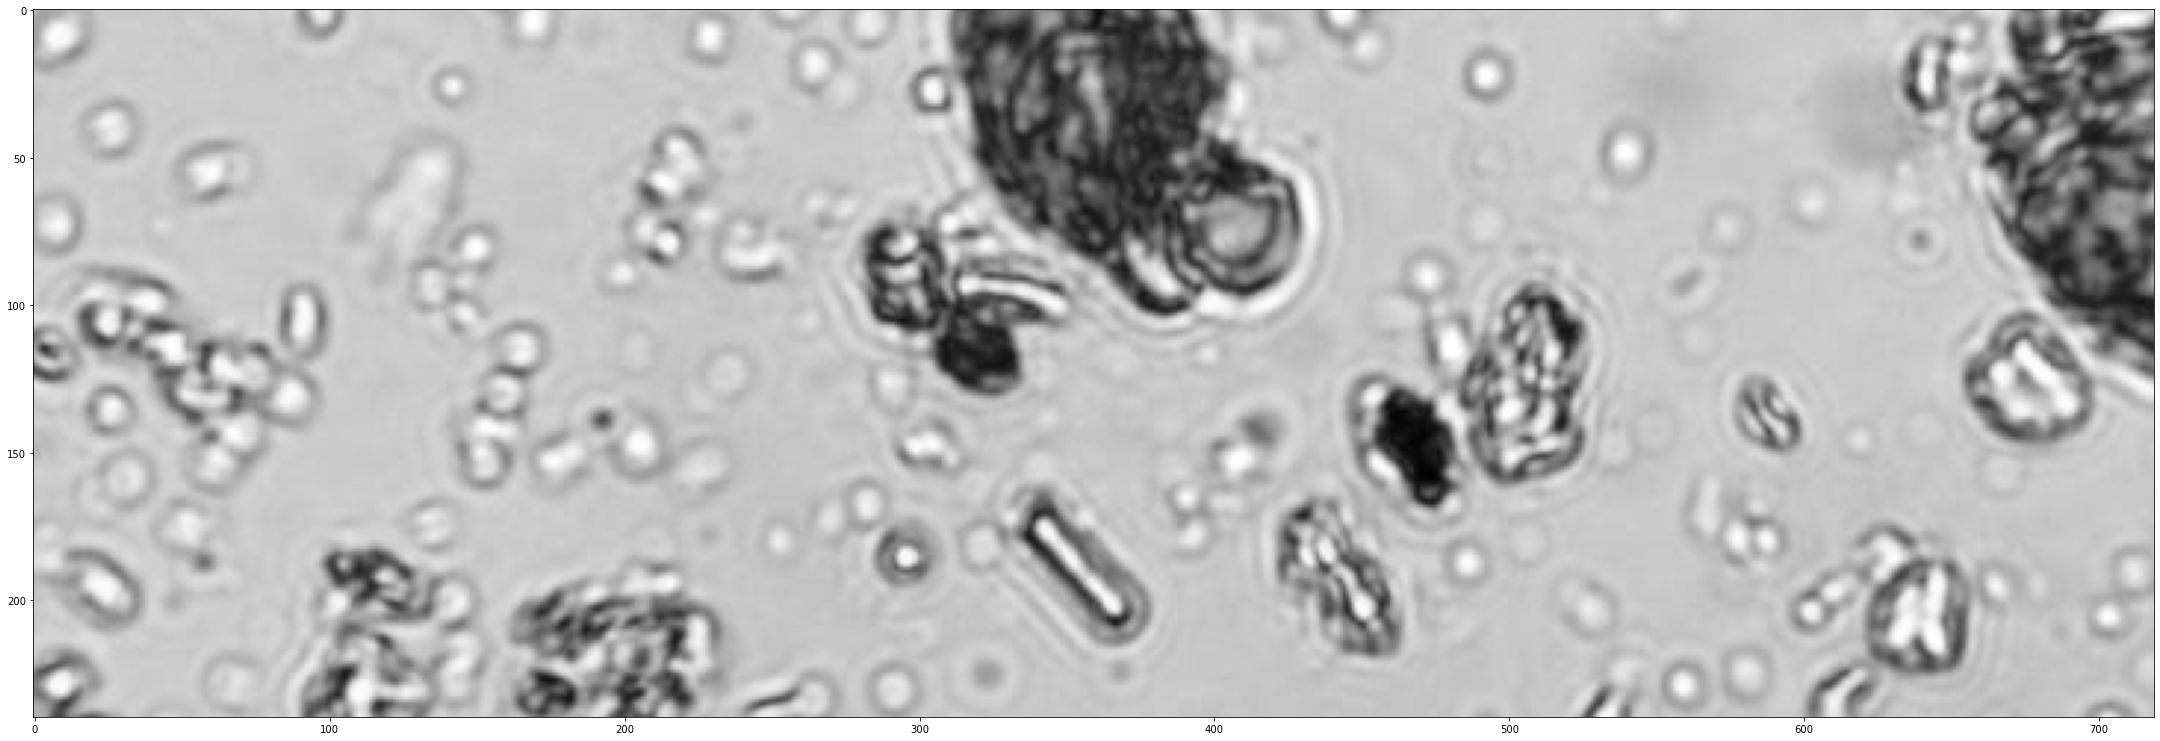

In [75]:
src_img = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)
show_image(src_img)

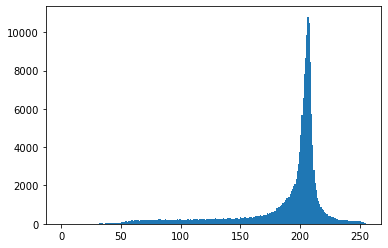

In [76]:
plt.hist(src_img.ravel(), 256, [0, 255])
plt.show()

(<Figure size 2736x1728 with 1 Axes>, <AxesSubplot:>)

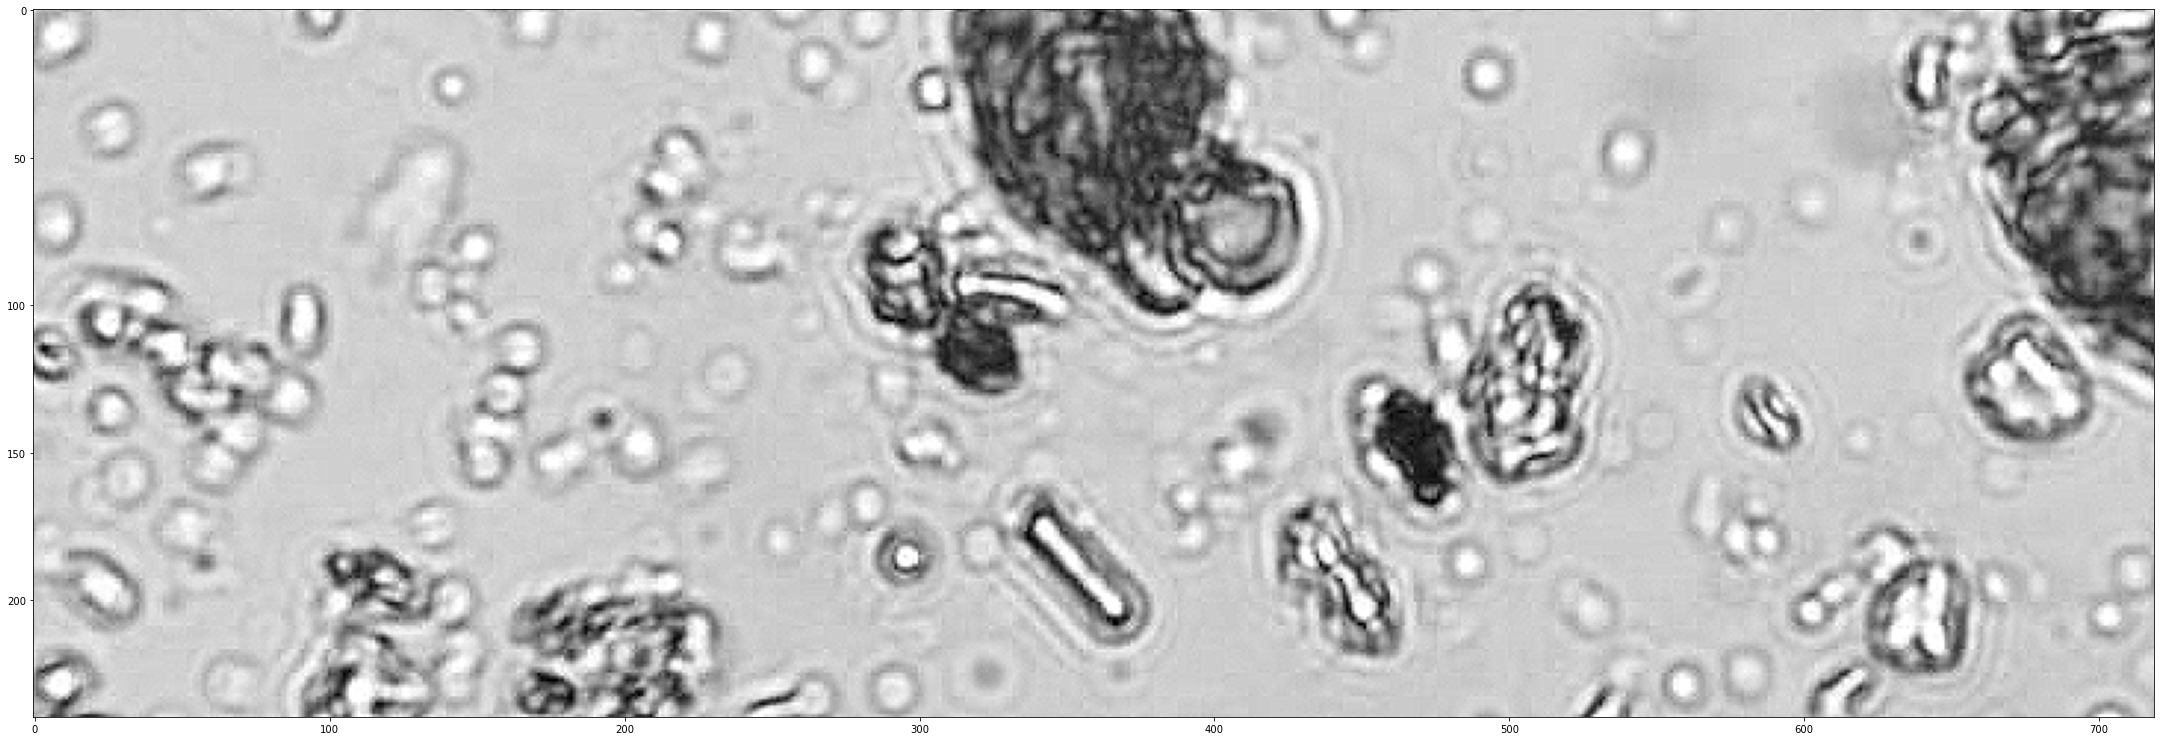

In [77]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpen = cv2.filter2D(src_img, ddepth=-1, kernel=kernel)
show_image(sharpen)

190.0


(<Figure size 2736x1728 with 1 Axes>, <AxesSubplot:>)

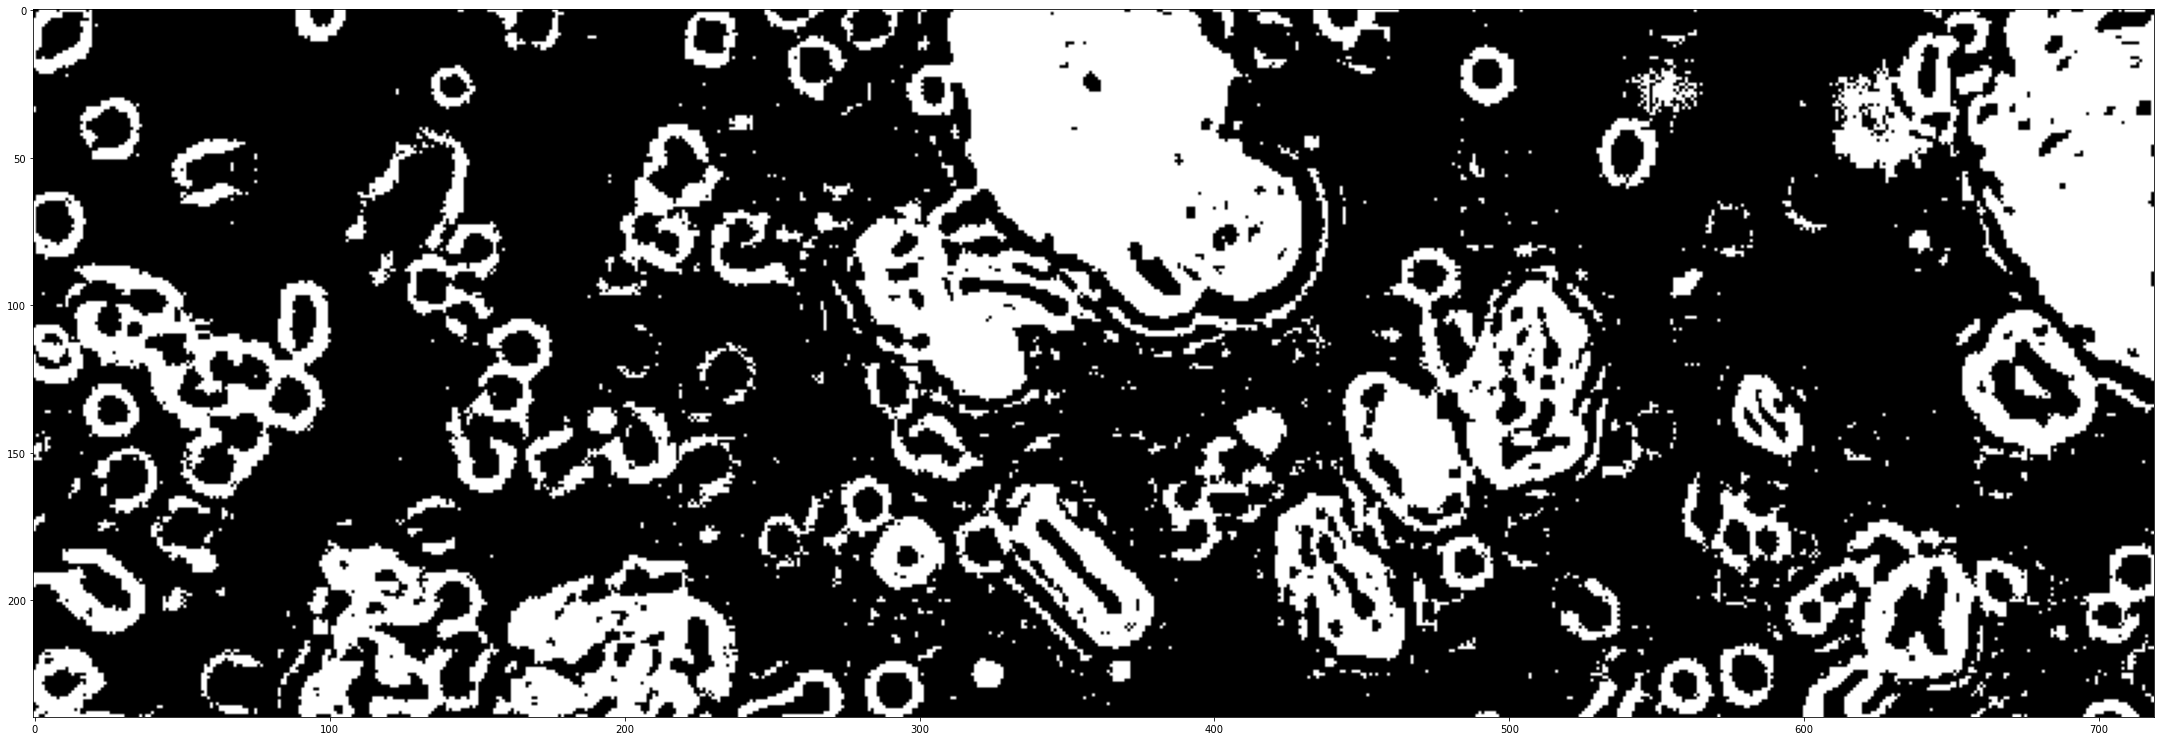

In [78]:
# ret, thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
ret, thresh = cv2.threshold(sharpen, 190, 255, cv2.THRESH_BINARY_INV)
print(ret)
show_image(thresh)

(<Figure size 2736x1728 with 1 Axes>, <AxesSubplot:>)

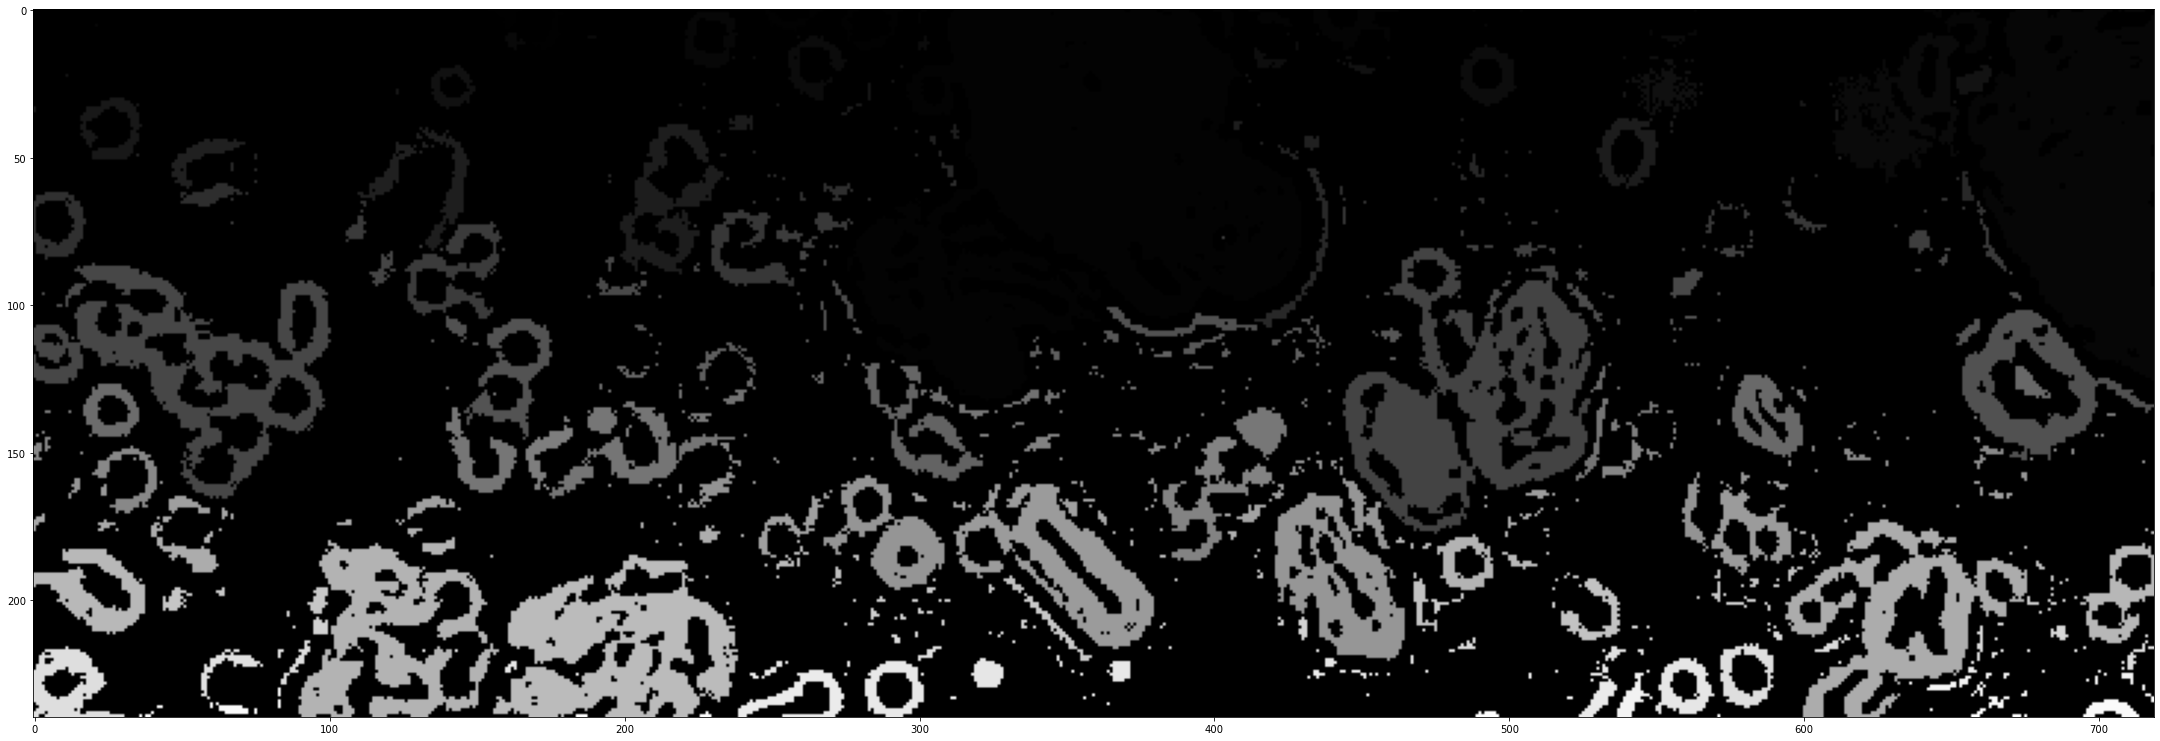

In [79]:
lable_image = measure.label(thresh, connectivity=src_img.ndim)
show_image(lable_image)

(<Figure size 2736x1728 with 1 Axes>, <AxesSubplot:>)

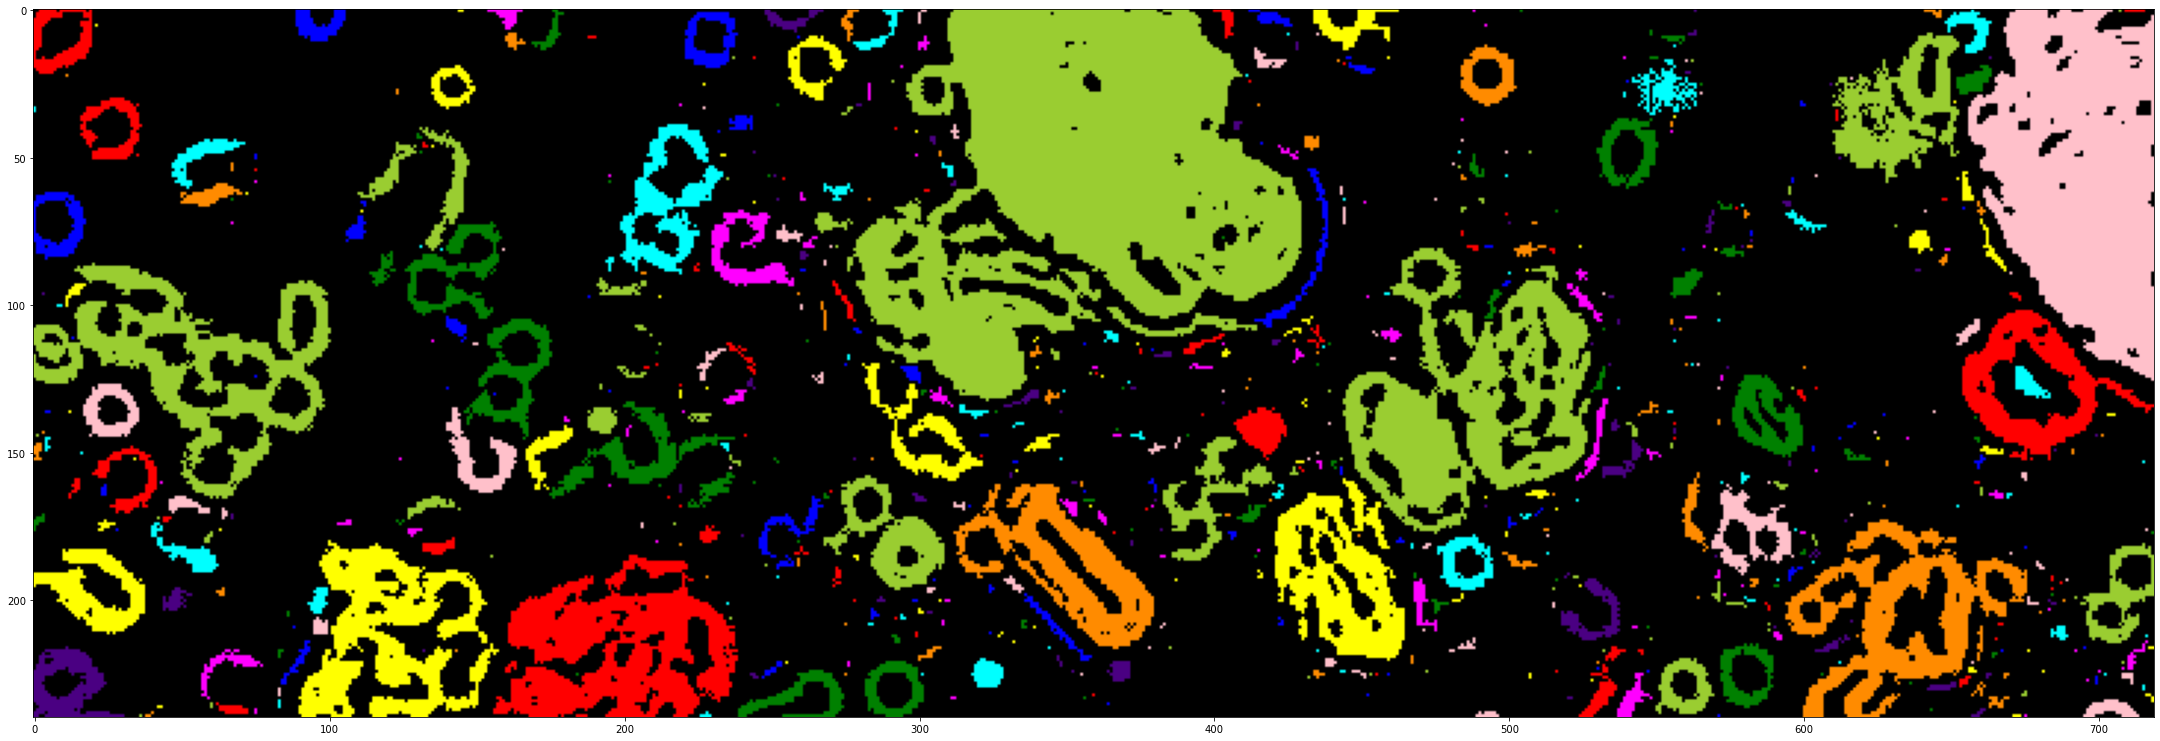

In [80]:
image_label_overlay = label2rgb(lable_image)
show_image(image_label_overlay, cmap='viridis')

In [81]:
cells = measure.regionprops(lable_image)


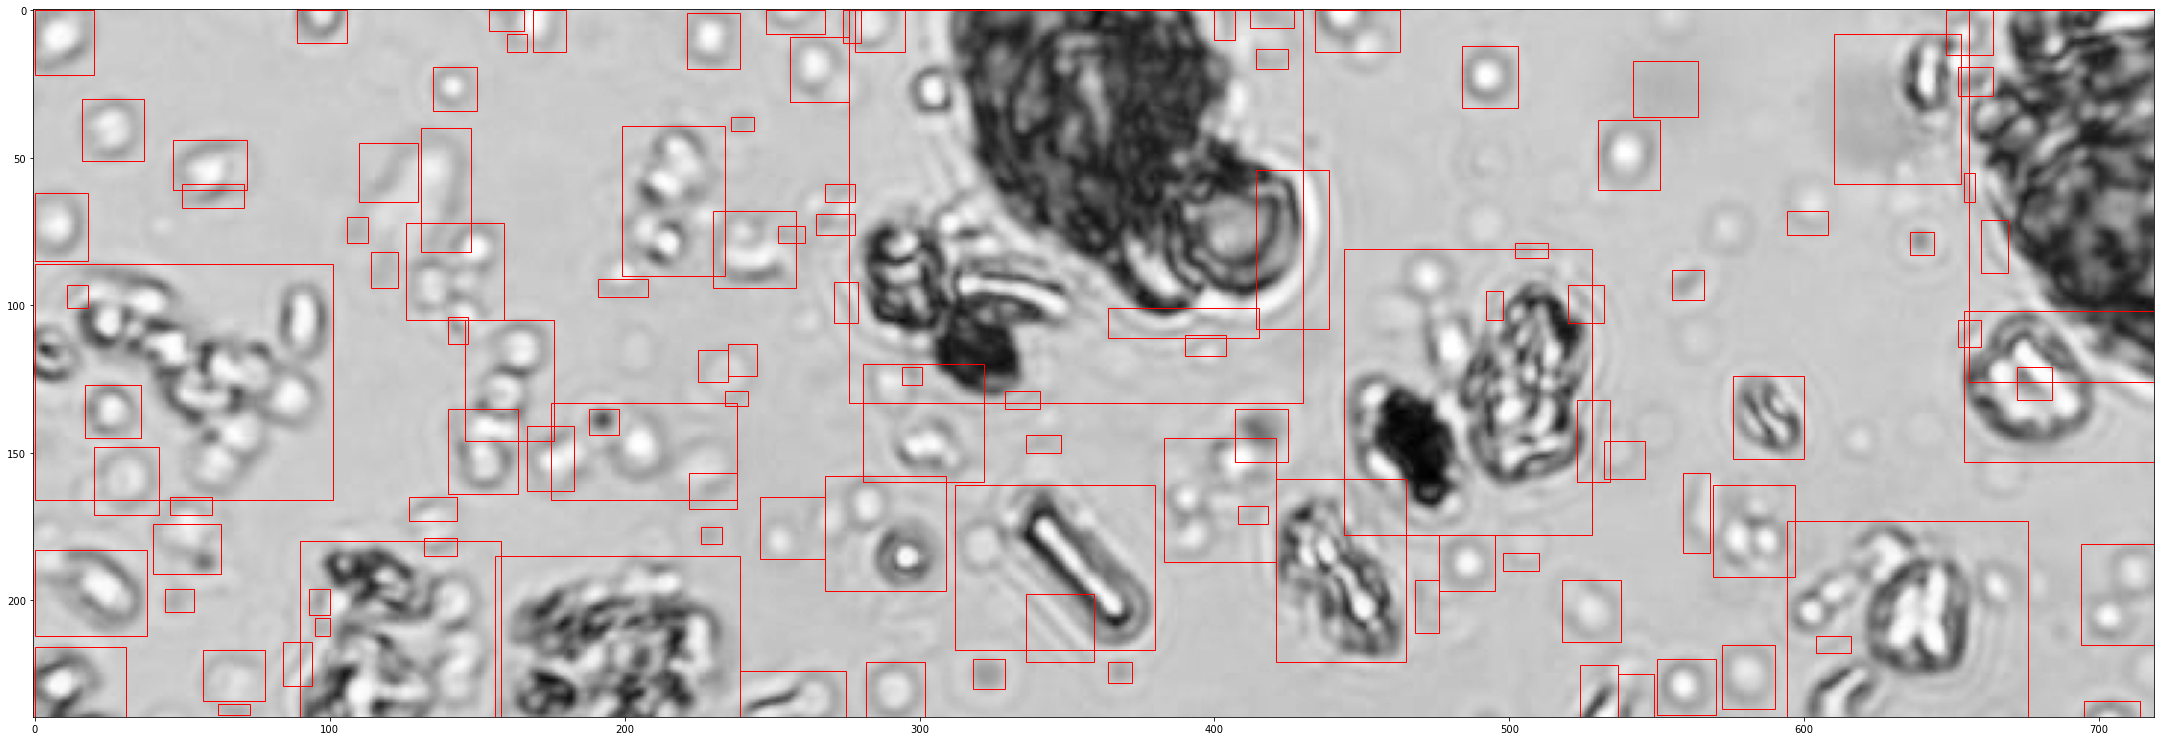

In [84]:
fig, ax = plt.subplots(figsize=figsize)
ax.imshow(src_img, cmap="gray")
for cell in cells:
    (min_row, min_col, max_row, max_col) = cell.bbox
    if(cell.area > 20):
        (x, y, w, h) = (min_col, min_row, max_col - min_col, max_row - min_row)
        ax.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor="red"))
plt.show()